# Data Visualization

After parameter tuning let's compare our tool to the baseline
> a.k.a. Readiscover.app to OpenAI's GPT-5.1

First let's combine all our runs in development and test sets

In [1]:
# import libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataframes

try:
    # All development question set runs
    readiscovers_app_results_df_DEV = pd.read_csv(
        "data/readiscovers_app_results_top_10_param_combos_RUN_2.csv"
    )
    readiscovers_app_results_df_DEV_RUN_3 = pd.read_csv(
        "data/readiscovers_app_results_top_10_param_combos_RUN_3.csv"
    )
    readiscovers_app_results_df_DEV_RUN_4 = pd.read_csv(
        "data/readiscovers_app_results_top_10_param_combos_RUN_4.csv"
    )
    readiscovers_app_results_df_DEV_RUN_5 = pd.read_csv(
        "data/readiscovers_app_results_top_3_param_combos_RUN_5.csv"
    )

    # Final test question set run
    readiscovers_app_results_df_TEST = pd.read_csv(
        "data/readiscovers_app_results_test_param_combos_RUN_2.csv"
    )

    # GPT vs Baseline Oz Extractor results
    oz_extractor_results_df = pd.read_csv("data/oz_gpt_vs_groundtruth_results_v1.csv")

    oz_extractor_results_df_hallucinated = pd.read_csv("data/oz_gpt_vs_groundtruth_results_hallucinated_v1.csv")
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure the CSV files are in the 'data' directory. Sometime you need to git lfs pull to get large files.")

In [3]:
# Function to create test_id from parameters
def create_test_id(row):
    return f"{int(row['target_chunk_size'])}_{int(row['sentence_overlap'])}_{int(row['small_paragraph_length'])}_{int(row['small_paragraph_overlap'])}"

# Add test_id to all dataframes
readiscovers_app_results_df_DEV['test_id'] = readiscovers_app_results_df_DEV.apply(create_test_id, axis=1)
readiscovers_app_results_df_DEV_RUN_3['test_id'] = readiscovers_app_results_df_DEV_RUN_3.apply(create_test_id, axis=1)
readiscovers_app_results_df_DEV_RUN_4['test_id'] = readiscovers_app_results_df_DEV_RUN_4.apply(create_test_id, axis=1)
readiscovers_app_results_df_DEV_RUN_5['test_id'] = readiscovers_app_results_df_DEV_RUN_5.apply(create_test_id, axis=1)

# Check for overlapping parameter combinations
run2_test_ids = set(readiscovers_app_results_df_DEV['test_id'].unique())
run3_test_ids = set(readiscovers_app_results_df_DEV_RUN_3['test_id'].unique())
run4_test_ids = set(readiscovers_app_results_df_DEV_RUN_4['test_id'].unique())
run5_test_ids = set(readiscovers_app_results_df_DEV_RUN_5['test_id'].unique())

run2_3_intersections = run2_test_ids.intersection(run3_test_ids)
run2_4_intersections = run2_test_ids.intersection(run4_test_ids)
run3_4_intersections = run3_test_ids.intersection(run4_test_ids)
run4_5_intersections = run4_test_ids.intersection(run5_test_ids)
run2_5_intersections = run2_test_ids.intersection(run5_test_ids)
run3_5_intersections = run3_test_ids.intersection(run5_test_ids)

if run2_3_intersections or run2_4_intersections or run3_4_intersections or run4_5_intersections or run2_5_intersections or run3_5_intersections:
    print("Overlapping parameter combinations found between runs:")
    if run2_3_intersections:
        raise Exception("RUN_2 & RUN_3 overlaps:", sorted(run2_3_intersections))
    if run2_4_intersections:
        raise Exception("RUN_2 & RUN_4 overlaps:", sorted(run2_4_intersections))
    if run3_4_intersections:
        raise Exception("RUN_3 & RUN_4 overlaps:", sorted(run3_4_intersections))
    if run4_5_intersections:
        raise Exception("RUN_4 & RUN_5 overlaps:", sorted(run4_5_intersections))
    if run2_5_intersections:
        raise Exception("RUN_2 & RUN_5 overlaps:", sorted(run2_5_intersections))
    if run3_5_intersections:
        raise Exception("RUN_3 & RUN_5 overlaps:", sorted(run3_5_intersections))

# Combine all dataframes, keeping only unique test_ids
combined_df = pd.concat([
    readiscovers_app_results_df_DEV,
    readiscovers_app_results_df_DEV_RUN_3,
    readiscovers_app_results_df_DEV_RUN_4,
    readiscovers_app_results_df_DEV_RUN_5
], ignore_index=True)

# Remove duplicate test_ids, keeping last occurrence
combined_df = combined_df.drop_duplicates(
    subset=['test_id', 'question_number', 'result_rank'],
    keep='last'
)

# Create a new sequential test_number based on unique test_ids
test_id_mapping = {test_id: idx + 1 for idx, test_id in enumerate(sorted(combined_df['test_id'].unique()))}
combined_df['test_number'] = combined_df['test_id'].map(test_id_mapping)

# Clean up text columns
oz_extractor_results_df["question"] = oz_extractor_results_df["question"].str.strip()
combined_df["original_query"] = combined_df["original_query"].str.strip()
oz_extractor_results_df_hallucinated["question"] = oz_extractor_results_df_hallucinated["question"].str.strip()

# Display the parameter combinations
print("Combined parameter combinations from ~ablation~ runs:")
display(combined_df.drop_duplicates('test_id')[
    ['test_number', 'test_id', 'target_chunk_size', 'sentence_overlap',
     'small_paragraph_length', 'small_paragraph_overlap']
].sort_values('test_number'))

# Replace the original dataframe variable
readiscovers_app_results_df_DEV = combined_df

Combined parameter combinations from ~ablation~ runs:


,test_number,test_id,target_chunk_size,sentence_overlap,small_paragraph_length,small_paragraph_overlap
300,1,1000_2_150_3,1000,2,150,3
180,2,1000_2_200_2,1000,2,200,2
240,3,1000_2_200_3,1000,2,200,3
540,4,1000_3_300_3,1000,3,300,3
840,5,1000_3_400_3,1000,3,400,3
600,6,1000_4_300_3,1000,4,300,3
960,7,1000_4_300_4,1000,4,300,4
900,8,1000_4_400_4,1000,4,400,4
1140,9,1100_3_300_3,1100,3,300,3
1080,10,1100_3_400_3,1100,3,400,3


First there are some bias adjustments we need to make, and the below cell will explain why...

In [4]:
avg_readiscover_chunk_span = readiscovers_app_results_df_TEST['matched_chunk_index'].apply(lambda x: len([x]) == 1).mean()
avg_oz_chunk_span = oz_extractor_results_df['all_model_chunks'].apply(
    lambda x: len(ast.literal_eval(x)) if pd.notna(x) and isinstance(x, str) else None
).mean()

print(f"Average readiscover.app Chunk Span: {avg_readiscover_chunk_span:.2f} chunks")
print(f"Average OpenAI's GPT-5.1 Chunk Span: {avg_oz_chunk_span:.2f} chunks")
print()
print(f"The OpenAI's GPT-5.1 chunk spans are on average {avg_oz_chunk_span / avg_readiscover_chunk_span:.2f} times larger than readiscover.app chunk spans.")

Average readiscover.app Chunk Span: 1.00 chunks
Average OpenAI's GPT-5.1 Chunk Span: 2.94 chunks

The OpenAI's GPT-5.1 chunk spans are on average 2.94 times larger than readiscover.app chunk spans.


### Adjusting for Chunk Boundaries in Scoring

Our current GPT scoring counts a match if there is any overlap between the "Best Answer" and the response. However, GPT-5.1 responses tend to be much longer, often more than twice the length of our tool’s responses, which naturally increases overlap and can bias scoring in its favor.  

To provide a fairer evaluation, we allow a **+/-1 chunk buffer** when checking for matches. This accounts for slight shifts in chunk boundaries while still rewarding precise retrieval. By using this buffer, we measure the true performance of our tool without letting longer responses artificially inflate scores.


In [5]:
# Apply bias towards readisover.app results since GPT-5.1 responses are almost three times as long
readiscovers_app_results_df_DEV['matched_all_chunk_indices'] = readiscovers_app_results_df_DEV['matched_chunk_index'].apply(lambda x: [x - 1 if x > 0 else x, x, x + 1])
readiscovers_app_results_df_TEST['matched_all_chunk_indices'] = readiscovers_app_results_df_TEST['matched_chunk_index'].apply(lambda x: [x - 1 if x > 0 else x, x, x + 1])

Adjust the hallucinated datasets to not match on hallucinated responses

In [6]:
# For hallucinated dataset, if any result for a question has [] or [-1], mark that result as out of bounds [-1]
oz_extractor_results_df_hallucinated['all_model_chunks'] = oz_extractor_results_df_hallucinated['all_model_chunks'].apply(lambda x: [-1] if x in [[], [-1],'[]', '[-1]'] else x)

### Assessing the data per question on the development and test question set split

First up is the development set

In [7]:
def min_distance_between_sets(set1, set2):
    if len(set1) == 0 or len(set2) == 0:
        return None

    # Calculate all pairwise absolute differences
    distances = [abs(a - b) for a in set1 for b in set2]

    return min(distances)

def analyze_search_results(
    df,
    matched_chunk_col,
    expected_chunks_col,
    question_col,
    matched_book_title_col,
    expected_book_title_col,
    test_col=None,
    result_rank_col='result_rank',
    top_k=3):

    # Make a copy to avoid modifying original
    df = df.copy()

    # Process each row with simple overlap matching
    def process_row_with_overlap(row):
        result = {}

        # Get the values
        expected_val = row[expected_chunks_col]
        matched_val = row[matched_chunk_col]

        # Check if both values exist and are not None/NaN
        # For lists, we need to check differently than pd.notna()
        has_expected = expected_val is not None and (not isinstance(expected_val, float) or not pd.isna(expected_val))
        has_matched = matched_val is not None and (not isinstance(matched_val, float) or not pd.isna(matched_val))
        book_match = row[matched_book_title_col] == row[expected_book_title_col]

        if has_expected and has_matched and book_match:
            # Parse expected chunks
            expected = ast.literal_eval(expected_val) if isinstance(expected_val, str) else expected_val
            expected_set = set(expected)

            # Parse matched chunks (now a list)
            matched = ast.literal_eval(matched_val) if isinstance(matched_val, str) else matched_val
            matched_set = set(matched)

            # Simple overlap check: ANY overlap means it's a match
            result['is_match'] = len(matched_set.intersection(expected_set)) > 0

            result['chunk_distance'] = min_distance_between_sets(matched_set, expected_set)
        else:
            # No expected chunks or matched chunks
            result['is_match'] = False
            result['chunk_distance'] = None

        return pd.Series(result)

    # Remove columns if they already exist
    cols_to_remove = ['is_match', 'chunk_distance']
    df = df.drop(columns=[col for col in cols_to_remove if col in df.columns])

    # Apply the function to create new columns
    overlap_metrics = df.apply(process_row_with_overlap, axis=1)
    df = pd.concat([df, overlap_metrics], axis=1)

    # Aggregate by question (and test if provided)
    def aggregate_by_question(group):
        # Get top K results by result_rank
        topk = group.nsmallest(top_k, result_rank_col)

        result = {}

        # For is_match: if ANY of top K is True, then True
        result['accuracy'] = topk['is_match'].any()

        # Chunk distance: min of top K
        min_chunk_distance = topk['chunk_distance'].min()
        result['min_chunk_distance'] = min_chunk_distance

        # Mean Reciprocal Rank (MRR): 1/rank of first match, 0 if no match
        # Sort entire group by rank and find first match
        group_sorted = group.sort_values(result_rank_col)
        matches = group_sorted[group_sorted['is_match'] == True]
        if len(matches) > 0:
            first_match_rank = matches.iloc[0][result_rank_col]
            result['reciprocal_rank'] = 1.0 / first_match_rank
        else:
            result['reciprocal_rank'] = 0.0

        return pd.Series(result)

    # Group by test and question, or just question
    if test_col:
        group_cols = [test_col, question_col]
    else:
        group_cols = [question_col]

    question_level_metrics = df.groupby(group_cols).apply(aggregate_by_question, include_groups=False).reset_index()

    # Calculate summary statistics
    agg_dict = {
        'accuracy': 'mean',
        'min_chunk_distance': 'mean',
        'reciprocal_rank': 'mean'
    }

    if test_col:
        summary_results = question_level_metrics.groupby(test_col).agg(agg_dict).reset_index()
        # Sort by match rate
        summary_results = summary_results.sort_values('accuracy', ascending=False)
    else:
        # If no test column, compute overall averages as a single row
        summary_dict = {}
        for key, agg_func in agg_dict.items():
            summary_dict[key] = question_level_metrics[key].mean()
        summary_results = pd.DataFrame([summary_dict])

    # Add reciprocal_rank back to the row-level dataframe by merging
    # Create a mapping from question (and test if applicable) to reciprocal_rank
    if test_col:
        rr_mapping = question_level_metrics[[test_col, question_col, 'reciprocal_rank']].copy()
        df = df.merge(rr_mapping, on=[test_col, question_col], how='left')
    else:
        rr_mapping = question_level_metrics[[question_col, 'reciprocal_rank']].copy()
        df = df.merge(rr_mapping, on=[question_col], how='left')


    return df, question_level_metrics, summary_results

# Run analysis for readiscovers_app_results_df_DEV
print("=" * 80)
print("READISCOVERS APP RESULTS ANALYSIS")
print("=" * 80)

readiscovers_with_metrics, readiscovers_question_metrics, readiscovers_test_averages = analyze_search_results(
    df=readiscovers_app_results_df_DEV,
    matched_chunk_col='matched_all_chunk_indices',
    expected_chunks_col='expected_all_chunk_indices',
    question_col='original_query',
    matched_book_title_col='matched_book_title',
    expected_book_title_col='expected_book_title',
    test_col='test_number',
    result_rank_col='result_rank',
    top_k=3
)

# Merge with chunking parameters for readiscovers
params_df = readiscovers_app_results_df_DEV.groupby('test_number').agg({
    'target_chunk_size': 'first',
    'sentence_overlap': 'first',
    'small_paragraph_length': 'first',
    'small_paragraph_overlap': 'first'
}).reset_index()

readiscovers_test_averages = readiscovers_test_averages.merge(params_df, on='test_number')

print("\n\nAverage metrics per test number:")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(readiscovers_test_averages.to_string(index=False))

# Run analysis for oz_extractor_results_df
print("\n\n" + "=" * 80)
print("OZ EXTRACTOR (GPT-5.1) RESULTS ANALYSIS")
print("=" * 80)

# Get the unique question numbers from readiscovers_app_results_df_DEV
valid_question_numbers = readiscovers_app_results_df_DEV['original_query'].unique()
print(f"\nFiltering to {len(valid_question_numbers)} questions used in readiscovers analysis")

# Filter oz_extractor to only those questions
oz_extractor_filtered = oz_extractor_results_df[
    oz_extractor_results_df['question'].isin(valid_question_numbers)
].copy()

print(f"Filtered from {len(oz_extractor_results_df)} to {len(oz_extractor_filtered)} rows")

oz_extractor_with_metrics, oz_question_metrics, oz_summary = analyze_search_results(
    df=oz_extractor_filtered,
    matched_chunk_col='all_model_chunks',
    expected_chunks_col='expected_all_chunk_indices',
    matched_book_title_col='model_filename',
    expected_book_title_col='expected_book_filename',
    question_col='question',
    test_col=None,  # No test number in this dataset
    result_rank_col='result_rank',
    top_k=3
)

print("\n\nOverall GPT-5.1 averages:")
print(oz_summary.to_string(index=False))


# Run analysis for oz_extractor_results_df_hallucinated
print("\n\n" + "=" * 80)
print("OZ EXTRACTOR (hallucinated) (GPT-5.1) RESULTS ANALYSIS")
print("=" * 80)

# Get the unique question numbers from readiscovers_app_results_df_DEV
valid_question_numbers = readiscovers_app_results_df_DEV['original_query'].unique()
print(f"\nFiltering to {len(valid_question_numbers)} questions used in readiscovers analysis")

# Filter oz_extractor to only those questions
oz_extractor_filtered_hallucinated = oz_extractor_results_df_hallucinated[
    oz_extractor_results_df_hallucinated['question'].isin(valid_question_numbers)
].copy()

print(f"Filtered from {len(oz_extractor_results_df_hallucinated)} to {len(oz_extractor_filtered_hallucinated)} rows")

oz_extractor_with_metrics_hallucinated, oz_question_metrics_hallucinated, oz_summary_hallucinated = analyze_search_results(
    df=oz_extractor_filtered_hallucinated,
    matched_chunk_col='all_model_chunks',
    expected_chunks_col='expected_all_chunk_indices',
    matched_book_title_col='model_filename',
    expected_book_title_col='expected_book_filename',
    question_col='question',
    test_col=None,  # No test number in this dataset
    result_rank_col='result_rank',
    top_k=3
)

print("\n\nOverall GPT-5.1 hallucinated averages:")
print(oz_summary_hallucinated.to_string(index=False))

READISCOVERS APP RESULTS ANALYSIS


Average metrics per test number:
 test_number  accuracy  min_chunk_distance  reciprocal_rank  target_chunk_size  sentence_overlap  small_paragraph_length  small_paragraph_overlap
          12      0.55           12.352941         0.383333               1200                 3                     300                        3
          17      0.50           27.444444         0.416667                600                 2                     150                        3
           2      0.50           19.588235         0.416667               1000                 2                     200                        2
           9      0.45           25.625000         0.341667               1100                 3                     300                        3
          20      0.45           12.176471         0.391667                800                 0                     200                        0
          19      0.45           30.611111         0.39

And now the test set. Only one final test run was made based on the development data results

In [8]:
# TEST SET ANALYSIS
readiscovers_with_metrics_TEST, readiscovers_question_metrics_TEST, readiscovers_test_averages_TEST = analyze_search_results(
    df=readiscovers_app_results_df_TEST,
    matched_chunk_col='matched_all_chunk_indices',
    expected_chunks_col='expected_all_chunk_indices',
    question_col='original_query',
    matched_book_title_col='matched_book_title',
    expected_book_title_col='expected_book_title',
    test_col='test_number',
    result_rank_col='result_rank',
    top_k=3
)

# Get the unique question numbers from readiscovers_app_results_df_TEST
valid_question_numbers_TEST = readiscovers_app_results_df_TEST['original_query'].unique()
print(f"\nFiltering to {len(valid_question_numbers_TEST)} questions used in readiscovers analysis")

# Filter oz_extractor to only those questions
oz_extractor_filtered_TEST = oz_extractor_results_df[
    oz_extractor_results_df['question'].isin(valid_question_numbers_TEST)
].copy()

print(f"Filtered from {len(oz_extractor_results_df)} to {len(oz_extractor_filtered_TEST)} rows")
oz_extractor_with_metrics_TEST, oz_question_metrics_TEST, oz_summary_TEST = analyze_search_results(
    df=oz_extractor_filtered_TEST,
    matched_chunk_col='all_model_chunks',
    expected_chunks_col='expected_all_chunk_indices',
    question_col='question',
    matched_book_title_col='model_filename',
    expected_book_title_col='expected_book_filename',
    test_col=None,  # No test number in this dataset
    result_rank_col='result_rank',
    top_k=3
)

# Filter oz_extractor to only those questions
oz_extractor_filtered_hallucinated_TEST = oz_extractor_results_df_hallucinated[
    oz_extractor_results_df_hallucinated['question'].isin(valid_question_numbers_TEST)
].copy()

print(f"Filtered from {len(oz_extractor_results_df_hallucinated)} to {len(oz_extractor_filtered_hallucinated_TEST)} rows")
oz_extractor_with_metrics_hallucinated_TEST, oz_question_metrics_hallucinated_TEST, oz_summary_hallucinated_TEST = analyze_search_results(
    df=oz_extractor_filtered_hallucinated_TEST,
    matched_chunk_col='all_model_chunks',
    expected_chunks_col='expected_all_chunk_indices',
    question_col='question',
    matched_book_title_col='model_filename',
    expected_book_title_col='expected_book_filename',
    test_col=None,  # No test number in this dataset
    result_rank_col='result_rank',
    top_k=3
)

params_df_TEST = readiscovers_app_results_df_TEST.groupby('test_number').agg({
    'target_chunk_size': 'first',
    'sentence_overlap': 'first',
    'small_paragraph_length': 'first',
    'small_paragraph_overlap': 'first'
}).reset_index()

readiscovers_test_averages_TEST = readiscovers_test_averages_TEST.merge(params_df_TEST, on='test_number')

print("\n\nAverage metrics per test number:")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(readiscovers_test_averages_TEST.to_string(index=False))

print("\n\nOverall GPT-5.1 averages:")
print(oz_summary_TEST.to_string(index=False))

print("\n\nOverall GPT-5.1 hallucinated averages:")
print(oz_summary_hallucinated_TEST.to_string(index=False))



Filtering to 50 questions used in readiscovers analysis
Filtered from 210 to 150 rows
Filtered from 210 to 147 rows


Average metrics per test number:
 test_number  accuracy  min_chunk_distance  reciprocal_rank  target_chunk_size  sentence_overlap  small_paragraph_length  small_paragraph_overlap
           1      0.34           18.580645             0.25               1200                 3                     300                        3


Overall GPT-5.1 averages:
 accuracy  min_chunk_distance  reciprocal_rank
     0.44           25.675676         0.403333


Overall GPT-5.1 hallucinated averages:
 accuracy  min_chunk_distance  reciprocal_rank
 0.428571           26.481481         0.343537


In [9]:
# Compare best readiscovers configuration with GPT-5.1 - DEV SET
print("=" * 80)
print("COMPARISON: Best Readiscovers Config vs GPT-5.1 (DEV SET)")
print("=" * 80)

# Get the best performing readiscovers config (first row after sorting by accuracy)
best_readiscovers = readiscovers_test_averages.iloc[0].copy()

# Create comparison dataframe
comparison_data = {
    'Metric': [],
    'Best Readiscover.app': [],
    'GPT-5.1': [],
    'GPT-5.1 (Hallucinated)': []
}

# Add configuration info for readiscover.app
comparison_data['Metric'].append('Configuration')
config_str = f"test_{int(best_readiscovers['test_number'])}: {int(best_readiscovers['target_chunk_size'])}/{int(best_readiscovers['sentence_overlap'])}/{int(best_readiscovers['small_paragraph_length'])}/{int(best_readiscovers['small_paragraph_overlap'])}"
comparison_data['Best Readiscover.app'].append(config_str)
comparison_data['GPT-5.1'].append('GPT-5.1')
comparison_data['GPT-5.1 (Hallucinated)'].append('GPT-5.1')

# Add separator
comparison_data['Metric'].append('---')
comparison_data['Best Readiscover.app'].append('---')
comparison_data['GPT-5.1'].append('---')
comparison_data['GPT-5.1 (Hallucinated)'].append('---')

# Add metrics
metrics = [
    ('Accuracy', 'accuracy'),
    ('MRR', 'reciprocal_rank'),
    ('MMCD', 'min_chunk_distance'),
]

for metric_name, metric_key in metrics:
    comparison_data['Metric'].append(metric_name)

    readiscovers_val = best_readiscovers[metric_key]
    chatgpt_val = oz_summary[metric_key].iloc[0]
    chatgpt_hallucinated_val = oz_summary_hallucinated[metric_key].iloc[0]

    # Format as percentage for match rates
    if 'Match' in metric_name or 'Rate' in metric_name or 'Accuracy' in metric_name:
        comparison_data['Best Readiscover.app'].append(f"{readiscovers_val:.1%}")
        comparison_data['GPT-5.1'].append(f"{chatgpt_val:.1%}")
        comparison_data['GPT-5.1 (Hallucinated)'].append(f"{chatgpt_hallucinated_val:.1%}")
    elif 'Distance' in metric_name:
        # Format distance metrics with 2 decimal places
        comparison_data['Best Readiscover.app'].append(f"{readiscovers_val:.2f}" if pd.notna(readiscovers_val) else "N/A")
        comparison_data['GPT-5.1'].append(f"{chatgpt_val:.2f}" if pd.notna(chatgpt_val) else "N/A")
        comparison_data['GPT-5.1 (Hallucinated)'].append(f"{chatgpt_hallucinated_val:.2f}" if pd.notna(chatgpt_hallucinated_val) else "N/A")
    else:
        comparison_data['Best Readiscover.app'].append(f"{readiscovers_val:.3f}")
        comparison_data['GPT-5.1'].append(f"{chatgpt_val:.3f}")
        comparison_data['GPT-5.1 (Hallucinated)'].append(f"{chatgpt_hallucinated_val:.3f}")

comparison_df = pd.DataFrame(comparison_data)

print("\n")
print(comparison_df.to_string(index=False))

# TEST SET COMPARISON
print("\n\n" + "=" * 80)
print("COMPARISON: Best Readiscovers Config vs GPT-5.1 (TEST SET)")
print("=" * 80)

# Get the best performing readiscovers config for TEST set
best_readiscovers_TEST = readiscovers_test_averages_TEST.iloc[0].copy()

# Create comparison dataframe for TEST
comparison_data_TEST = {
    'Metric': [],
    'Best Readiscover.app': [],
    'GPT-5.1': [],
    'GPT-5.1 (Hallucinated)': []
}

# Add configuration info for readiscover.app
comparison_data_TEST['Metric'].append('Configuration')
config_str_TEST = f"test_{int(best_readiscovers_TEST['test_number'])}: {int(best_readiscovers_TEST['target_chunk_size'])}/{int(best_readiscovers_TEST['sentence_overlap'])}/{int(best_readiscovers_TEST['small_paragraph_length'])}/{int(best_readiscovers_TEST['small_paragraph_overlap'])}"
comparison_data_TEST['Best Readiscover.app'].append(config_str_TEST)
comparison_data_TEST['GPT-5.1'].append('GPT-5.1')
comparison_data_TEST['GPT-5.1 (Hallucinated)'].append('GPT-5.1')

# Add separator
comparison_data_TEST['Metric'].append('---')
comparison_data_TEST['Best Readiscover.app'].append('---')
comparison_data_TEST['GPT-5.1'].append('---')
comparison_data_TEST['GPT-5.1 (Hallucinated)'].append('---')

for metric_name, metric_key in metrics:
    comparison_data_TEST['Metric'].append(metric_name)

    readiscovers_val = best_readiscovers_TEST[metric_key]
    chatgpt_val = oz_summary_TEST[metric_key].iloc[0]
    chatgpt_hallucinated_val = oz_summary_hallucinated_TEST[metric_key].iloc[0]

    # Format as percentage for match rates
    if 'Match' in metric_name or 'Rate' in metric_name or 'Accuracy' in metric_name:
        comparison_data_TEST['Best Readiscover.app'].append(f"{readiscovers_val:.1%}")
        comparison_data_TEST['GPT-5.1'].append(f"{chatgpt_val:.1%}")
        comparison_data_TEST['GPT-5.1 (Hallucinated)'].append(f"{chatgpt_hallucinated_val:.1%}")
    elif 'Distance' in metric_name:
        comparison_data_TEST['Best Readiscover.app'].append(f"{readiscovers_val:.2f}" if pd.notna(readiscovers_val) else "N/A")
        comparison_data_TEST['GPT-5.1'].append(f"{chatgpt_val:.2f}" if pd.notna(chatgpt_val) else "N/A")
        comparison_data_TEST['GPT-5.1 (Hallucinated)'].append(f"{chatgpt_hallucinated_val:.2f}" if pd.notna(chatgpt_hallucinated_val) else "N/A")
    else:
        comparison_data_TEST['Best Readiscover.app'].append(f"{readiscovers_val:.3f}")
        comparison_data_TEST['GPT-5.1'].append(f"{chatgpt_val:.3f}")
        comparison_data_TEST['GPT-5.1 (Hallucinated)'].append(f"{chatgpt_hallucinated_val:.3f}")

comparison_df_TEST = pd.DataFrame(comparison_data_TEST)

print("\n")
print(comparison_df_TEST.to_string(index=False))

COMPARISON: Best Readiscovers Config vs GPT-5.1 (DEV SET)


       Metric  Best Readiscover.app GPT-5.1 GPT-5.1 (Hallucinated)
Configuration test_12: 1200/3/300/3 GPT-5.1                GPT-5.1
          ---                   ---     ---                    ---
     Accuracy                 55.0%   60.0%                  50.0%
          MRR                 0.383   0.492                  0.350
         MMCD                12.353   9.450                 13.278


COMPARISON: Best Readiscovers Config vs GPT-5.1 (TEST SET)


       Metric Best Readiscover.app GPT-5.1 GPT-5.1 (Hallucinated)
Configuration test_1: 1200/3/300/3 GPT-5.1                GPT-5.1
          ---                  ---     ---                    ---
     Accuracy                34.0%   44.0%                  42.9%
          MRR                0.250   0.403                  0.344
         MMCD               18.581  25.676                 26.481


### Compare question level intersect and union

Aka what was readiscover.app better at and what was OpenAI's GPT-5.1 better at?

In [10]:
# Compare which questions matched for each system
print("\n\n" + "=" * 80)
print("QUESTION-LEVEL COMPARISON: Readiscovers vs GPT-5.1")
print("=" * 80)

# Get question-level results for best readiscovers config
best_test_num_TEST = int(best_readiscovers_TEST['test_number'])
readiscovers_test_questions = readiscovers_question_metrics_TEST[
    readiscovers_question_metrics_TEST['test_number'] == best_test_num_TEST
].copy()
readiscovers_test_questions = readiscovers_test_questions.rename(columns={'accuracy': 'readiscovers_match'})

# Get question-level results for GPT-5.1
chatgpt_test_questions = oz_question_metrics_TEST.copy()
chatgpt_test_questions = chatgpt_test_questions.rename(columns={'accuracy': 'chatgpt_match'})

# Merge on question text
comparison_TEST = readiscovers_test_questions[['original_query', 'readiscovers_match']].merge(
    chatgpt_test_questions[['question', 'chatgpt_match']],
    left_on='original_query',
    right_on='question',
    how='outer'
)

# Fill NaN values with False (questions not in one dataset)
comparison_TEST['readiscovers_match'] = comparison_TEST['readiscovers_match'].fillna(False)
comparison_TEST['chatgpt_match'] = comparison_TEST['chatgpt_match'].fillna(False)

# Categorize questions
comparison_TEST['category'] = 'Neither'
comparison_TEST.loc[comparison_TEST['readiscovers_match'] & comparison_TEST['chatgpt_match'], 'category'] = 'Both'
comparison_TEST.loc[comparison_TEST['readiscovers_match'] & ~comparison_TEST['chatgpt_match'], 'category'] = 'Readiscovers Only'
comparison_TEST.loc[~comparison_TEST['readiscovers_match'] & comparison_TEST['chatgpt_match'], 'category'] = 'GPT-5.1 Only'

# Print summary statistics
print("\nSummary:")
print(f"Total questions: {len(comparison_TEST)}")
print(f"Both systems matched: {(comparison_TEST['category'] == 'Both').sum()} ({(comparison_TEST['category'] == 'Both').sum() / len(comparison_TEST) * 100:.1f}%)")
print(f"Readiscovers only: {(comparison_TEST['category'] == 'Readiscovers Only').sum()} ({(comparison_TEST['category'] == 'Readiscovers Only').sum() / len(comparison_TEST) * 100:.1f}%)")
print(f"GPT-5.1 only: {(comparison_TEST['category'] == 'GPT-5.1 Only').sum()} ({(comparison_TEST['category'] == 'GPT-5.1 Only').sum() / len(comparison_TEST) * 100:.1f}%)")
print(f"Neither matched: {(comparison_TEST['category'] == 'Neither').sum()} ({(comparison_TEST['category'] == 'Neither').sum() / len(comparison_TEST) * 100:.1f}%)")

# Show questions that only one system matched
print("\n\nQuestions matched by Readiscovers but NOT GPT-5.1:")
readiscovers_only_TEST = comparison_TEST[comparison_TEST['category'] == 'Readiscovers Only']['original_query'].tolist()
for i, q in enumerate(readiscovers_only_TEST, 1):
    print(f"{i}. {q}")

print("\n\nQuestions matched by GPT-5.1 but NOT Readiscovers:")
chatgpt_only_TEST = comparison_TEST[comparison_TEST['category'] == 'GPT-5.1 Only']['original_query'].fillna(comparison_TEST['question']).tolist()
for i, q in enumerate(chatgpt_only_TEST, 1):
    print(f"{i}. {q}")



QUESTION-LEVEL COMPARISON: Readiscovers vs GPT-5.1

Summary:
Total questions: 50
Both systems matched: 11 (22.0%)
Readiscovers only: 6 (12.0%)
GPT-5.1 only: 11 (22.0%)
Neither matched: 22 (44.0%)


Questions matched by Readiscovers but NOT GPT-5.1:
1. How do you wind Tiktok?
2. How does the Wizard get the name Oz?
3. What are the Cuttenclips?
4. What color are Dorothy's shoes?
5. When do we first see a gun in the series?
6. Who rules Oz after the Wizard leaves?


Questions matched by GPT-5.1 but NOT Readiscovers:
1. How does Baum explain reviving the Oz books after The Emerald City of Oz?
2. How does Dorothy stay connected to Ozma, even when she's not in Oz?
3. How does Guph describe Ozma?
4. How does Mombi hide from Glinda?
5. How is Ozma hidden?
6. What does Eureka look like?
7. What is Aunt Em's reaction to seeing the Emerald City for the first time?
8. What is the Tin Man's name?
9. What is the last item Ojo finds?
10. When is the first time we read "There's no place like home"?


In [11]:
def plot_comparison_bar_chart(col_to_compare, title):
    # Get best test configurations
    best_test_num_TEST = int(best_readiscovers_TEST['test_number'])

    # First normalize book names
    def normalize_book_name(name):
        if pd.isna(name):
            return None
        return name.replace('_', ' ').replace('.txt', '').strip().lower()

    # Extract per-book accuracy for Readiscover.app TEST
    readiscovers_test_temp = readiscovers_with_metrics_TEST[
        readiscovers_with_metrics_TEST['test_number'] == best_test_num_TEST
    ].copy()
    readiscovers_test_temp['book_normalized'] = readiscovers_test_temp['expected_book_title'].apply(normalize_book_name)

    readiscovers_test_per_book = readiscovers_test_temp.groupby('book_normalized').agg({
        col_to_compare: 'mean'
    }).reset_index()
    readiscovers_test_per_book.columns = ['book_normalized', 'readiscovers_test_compare']


    # Extract per-book accuracy for GPT-5.1 TEST
    chatgpt_test_temp = oz_extractor_with_metrics_TEST.copy()
    chatgpt_test_temp['book_normalized'] = chatgpt_test_temp['expected_book_filename'].apply(normalize_book_name)

    chatgpt_test_per_book = chatgpt_test_temp.groupby('book_normalized').agg({
        col_to_compare: 'mean'
    }).reset_index()
    chatgpt_test_per_book.columns = ['book_normalized', 'chatgpt_test_compare']

    # Merge on normalized book name
    book_comparison = readiscovers_test_per_book.merge(
        chatgpt_test_per_book,
        on='book_normalized',
        how='outer'
    )

    # Fill NaN with 0
    book_comparison = book_comparison.fillna(0)

    # Define the order of Oz books in the series
    oz_book_order = [
        'the wonderful wizard of oz',
        'the marvelous land of oz',
        'ozma of oz',
        'dorothy and the wizard in oz',
        'the road to oz',
        'the emerald city of oz',
        'the patchwork girl of oz',
        'tik tok of oz',
        'the scarecrow of oz',
        'rinkitink in oz',
        'the lost princess of oz',
        'the tin woodman of oz',
        'the magic of oz',
        'glinda of oz'
    ]

    # Create a mapping for sorting
    book_order_map = {book: idx for idx, book in enumerate(oz_book_order)}

    # Add sort order column (use 999 for books not in the list)
    book_comparison['sort_order'] = book_comparison['book_normalized'].map(
        lambda x: book_order_map.get(x, 999)
    )

    # Sort by series order
    book_comparison = book_comparison.sort_values('sort_order')

    # Create readable book names for display
    def format_book_name(name):
        if pd.isna(name):
            return "Unknown"
        # Capitalize each word
        return ' '.join(word.capitalize() for word in name.split())

    book_comparison['book_display'] = book_comparison['book_normalized'].apply(format_book_name)

    # Create grouped bar chart
    fig, ax = plt.subplots(figsize=(16, 10))

    x = np.arange(len(book_comparison))
    width = 0.35

    # Determine if this is an accuracy metric (values between 0 and 1)
    is_accuracy = col_to_compare == 'is_match'

    # Create bars with borders
    bars1 = ax.bar(x - width/2, book_comparison['readiscovers_test_compare'], width,
                  label='readiscover.app', color="#00A86B", alpha=0.8,
                  edgecolor="#007A4D", linewidth=1.5)
    bars2 = ax.bar(x + width/2, book_comparison['chatgpt_test_compare'], width,
                  label='GPT-5.1', color="#FF69B4", alpha=0.8,
                  edgecolor="#CC5490", linewidth=1.5)

    # Add value labels on top of bars
    for bar in bars1:
        height = bar.get_height()
        if is_accuracy:
            label_text = f'{height:.0%}'
        else:
            label_text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height,
                label_text,
                ha='center', va='bottom', fontsize=15, fontfamily='Arial')

    for bar in bars2:
        height = bar.get_height()
        if is_accuracy:
            label_text = f'{height:.0%}'
        else:
            label_text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height,
                label_text,
                ha='center', va='bottom', fontsize=15, fontfamily='Arial')

    # Customize the plot
    ax.set_title(f'{title} Comparison per Book: readiscover.app vs GPT-5.1',
                fontsize=20, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(book_comparison['book_display'], rotation=45, ha='right', fontsize=15, fontfamily='Arial')

    # Create legend with matching background color
    legend = ax.legend(loc='upper left', edgecolor='white', prop={'family': 'Arial', 'size': 15})
    legend.get_frame().set_alpha(1)

    # Auto-adjust y-axis to fit data with some padding
    max_val = max(book_comparison['readiscovers_test_compare'].max(),
                  book_comparison['chatgpt_test_compare'].max())
    ax.set_ylim(0, max_val * 1.15)  # 15% padding for labels

    # Remove y-axis labels, ticks, and spine
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['left'].set_visible(False)

    # Remove other spines and x-axis ticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', length=0)  # Remove x-axis tick marks

    plt.tight_layout()
    plt.show()

Now let's see hwo the two tools did on a book level

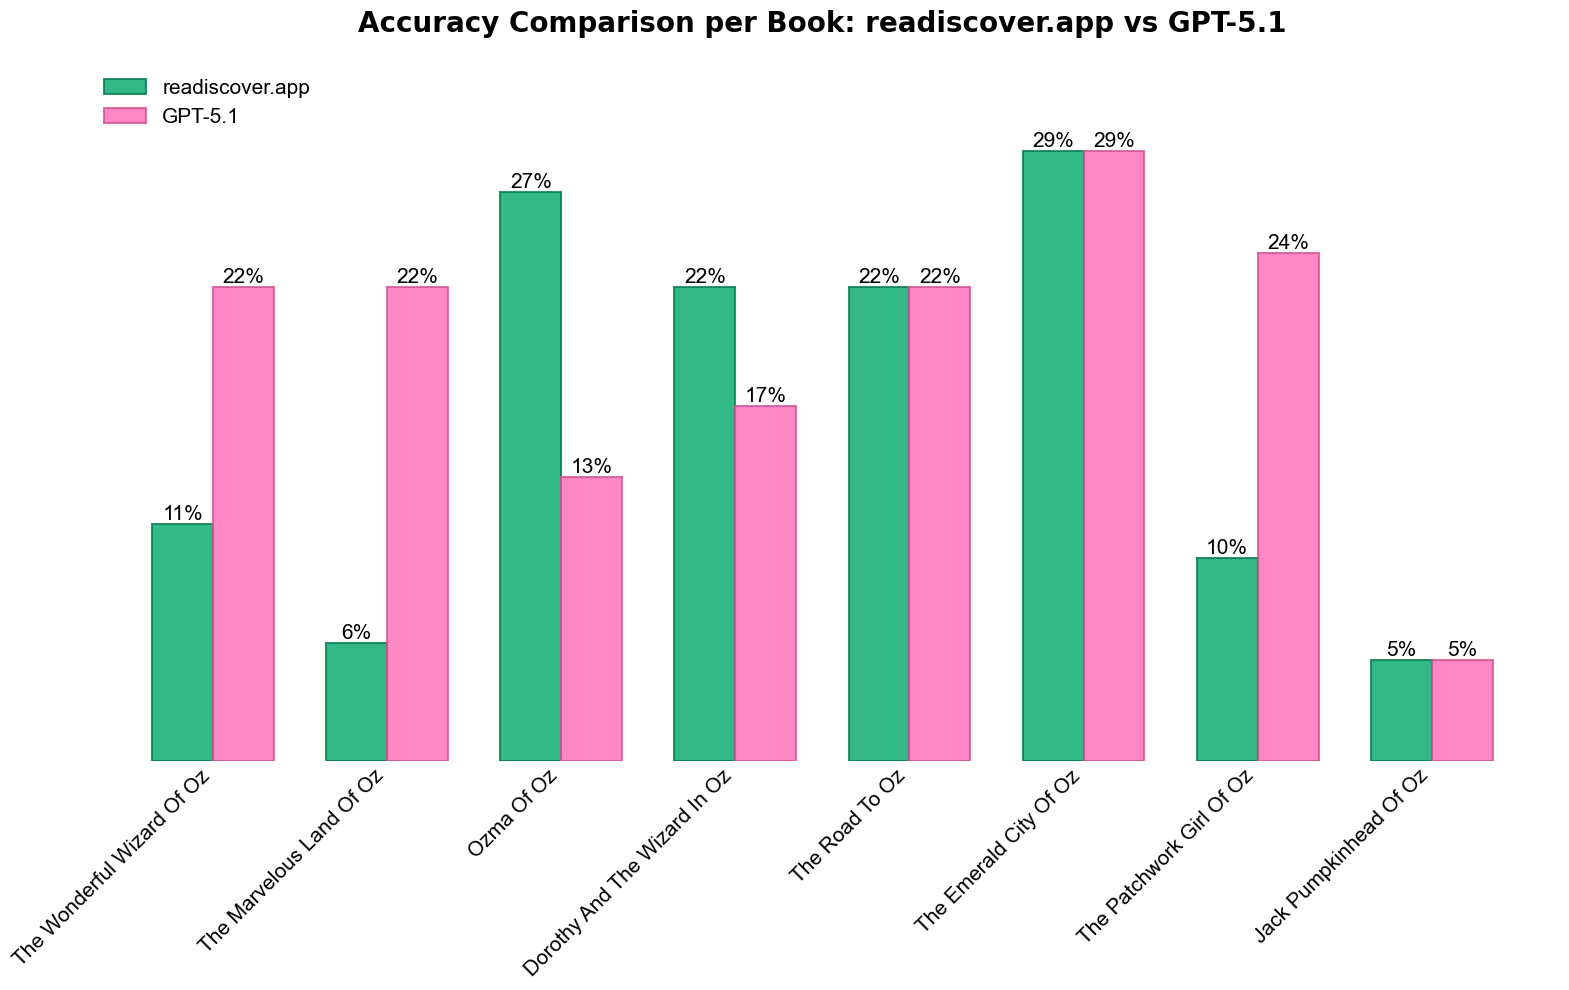

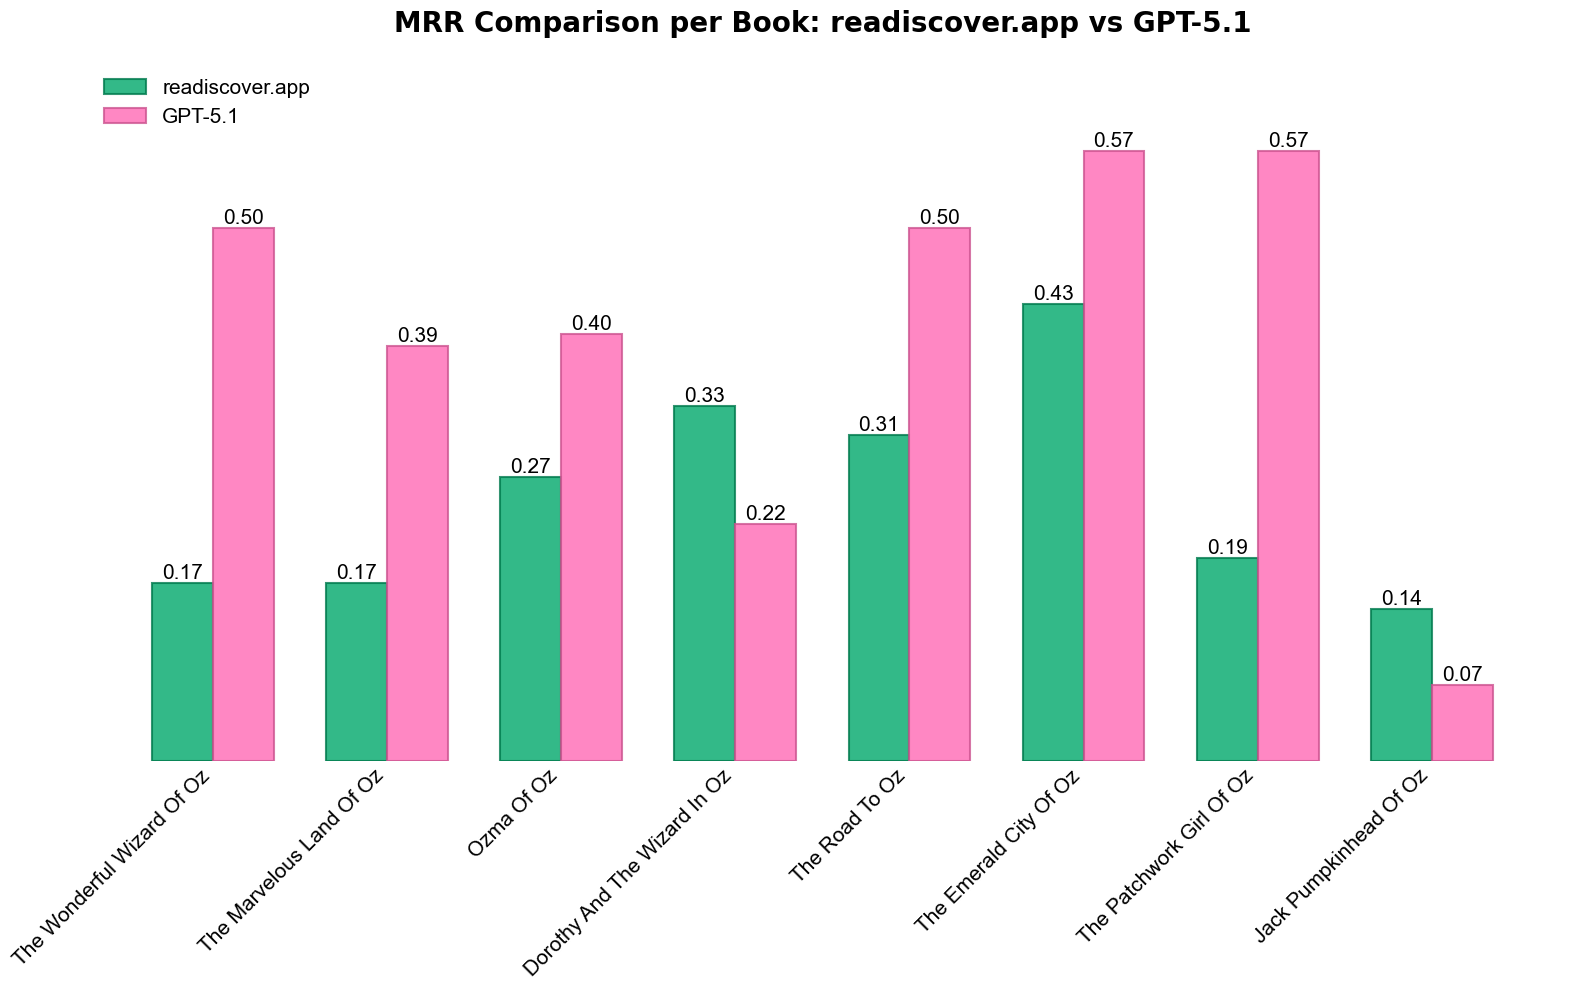

In [12]:
plot_comparison_bar_chart('is_match', 'Accuracy')
plot_comparison_bar_chart('reciprocal_rank', 'MRR')

Also interesting to see the chunk length distribution given that was not a parameter tuning metric

In [13]:
def plot_chunk_length_distribution(book_file_name: str):
    # Get top 3 test numbers by accuracy score
    top_3_tests = readiscovers_test_averages.nlargest(3, 'accuracy')

    # Create a single plot
    fig, ax = plt.subplots(figsize=(14, 8), facecolor='white')
    ax.set_facecolor('white')
    fig.suptitle(f'Chunk Length Distribution for "{book_file_name.replace("_", " ").title()}" - Top 3 Configurations',
                fontsize=16, fontfamily='Arial')

    # Define colors matching the theme
    colors = ['#00A86B', '#FF69B4', '#FFD700']  # Green, Pink, Gold
    edge_colors = ['#007A4D', '#CC5490', '#B8960A']  # Darker versions for borders

    # For each of the top 3 tests, get chunk lengths
    for idx, (_, row) in enumerate(top_3_tests.iterrows()):
        test_num = int(row['test_number'])

        # Get the first occurrence of this test number to access all_chunks
        test_row = readiscovers_app_results_df_DEV[
            readiscovers_app_results_df_DEV['test_number'] == test_num
        ].iloc[0]

        # Parse all_chunks
        all_chunks = ast.literal_eval(test_row['all_chunks']) if isinstance(test_row['all_chunks'], str) else test_row['all_chunks']

        if book_file_name in all_chunks:
            chunk_lengths = all_chunks[book_file_name]

            # Create label with test number and parameters
            label = f"Param Config {int(row['target_chunk_size'])}/{int(row['sentence_overlap'])}/{int(row['small_paragraph_length'])}/{int(row['small_paragraph_overlap'])} (acc={row['accuracy']:.1%})"

            # Plot histogram with borders
            ax.hist(chunk_lengths, bins=50, alpha=0.6, label=label,
                    color=colors[idx], edgecolor=edge_colors[idx], linewidth=1.5)

    ax.set_xlabel('Chunk Length (characters)', fontsize=12, fontfamily='Arial')
    ax.set_ylabel('Frequency', fontsize=12, fontfamily='Arial')

    # Update legend styling
    legend = ax.legend(fontsize=10, loc='upper right', facecolor='white', edgecolor='none',
                    prop={'family': 'Arial'})
    legend.get_frame().set_alpha(1)

    # Remove grid
    ax.grid(False)

    # Remove all spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Remove tick marks and labels
    ax.tick_params(axis='both', length=0)
    ax.set_yticklabels([])  # Remove y-axis tick labels

    plt.tight_layout()
    plt.show()

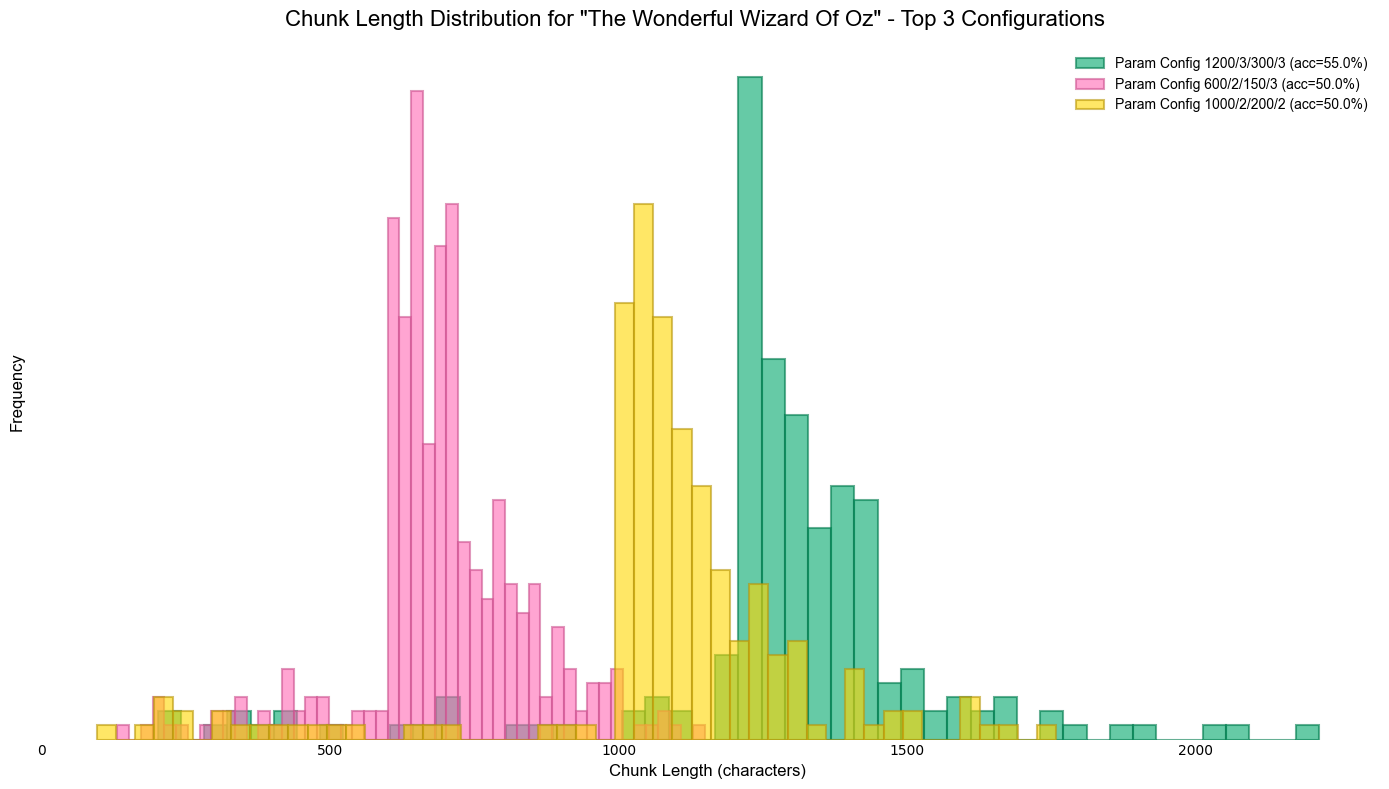

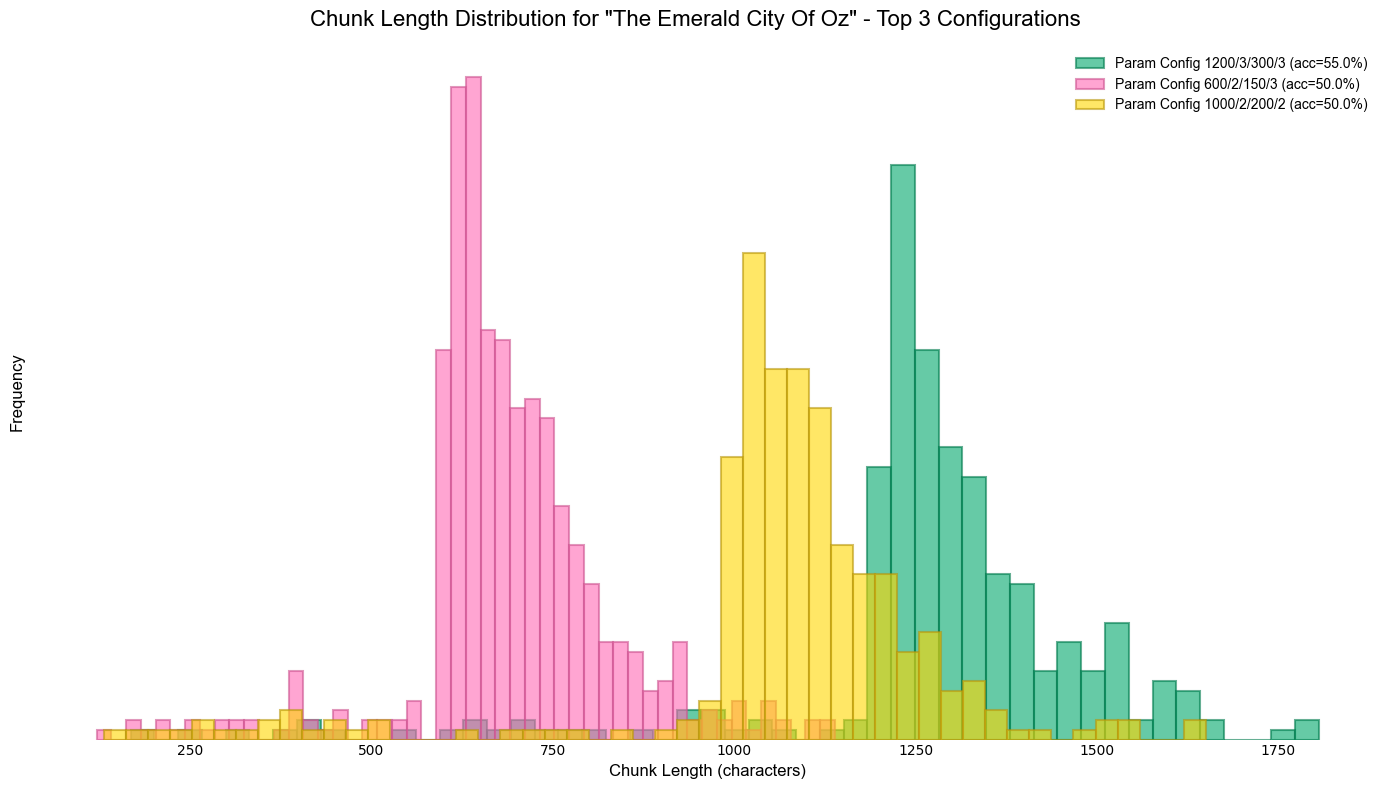

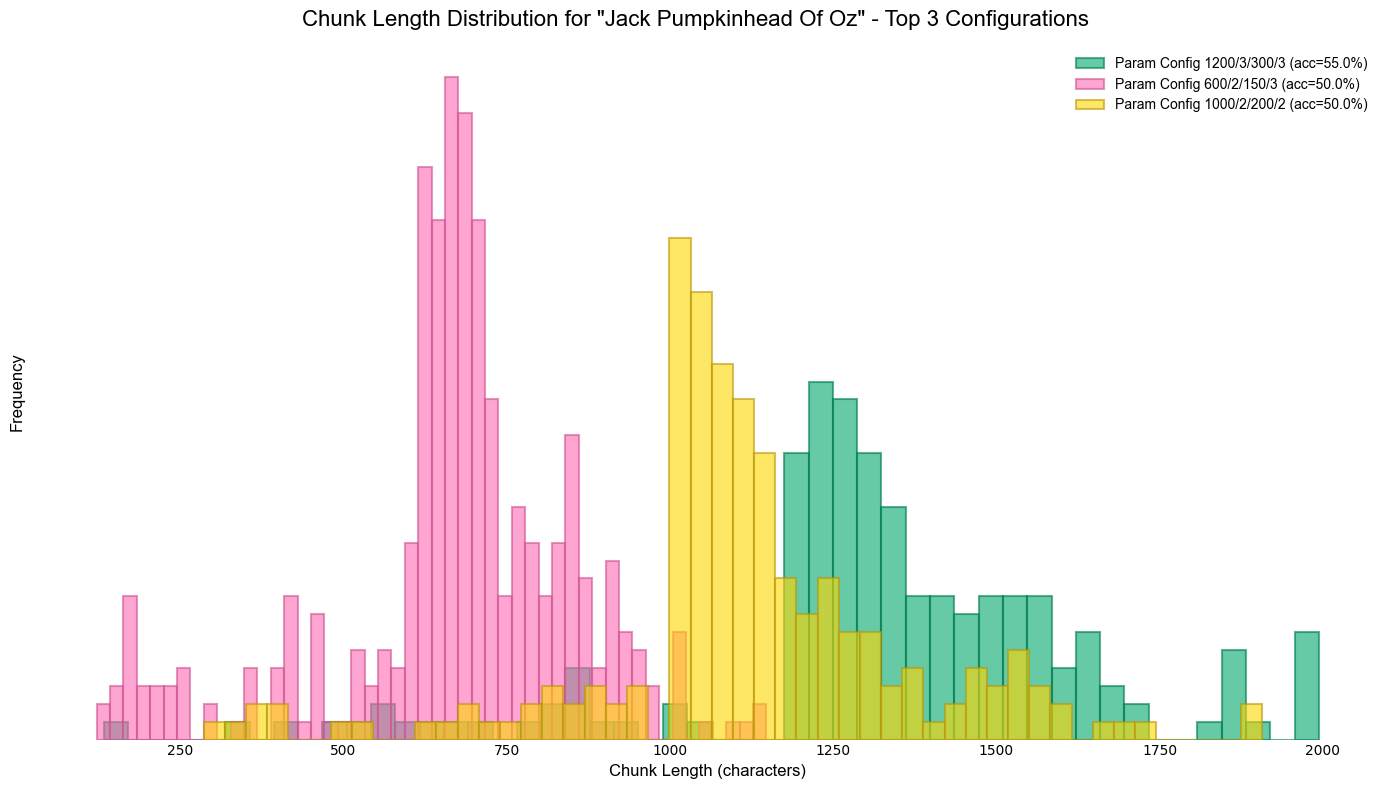

In [14]:
plot_chunk_length_distribution('the_wonderful_wizard_of_oz')
plot_chunk_length_distribution('the_emerald_city_of_oz')
plot_chunk_length_distribution('jack_pumpkinhead_of_oz')

Lastly, plot mean minimum chunk distance (MMCD) comparison between Readiscovers and GPT-5.1

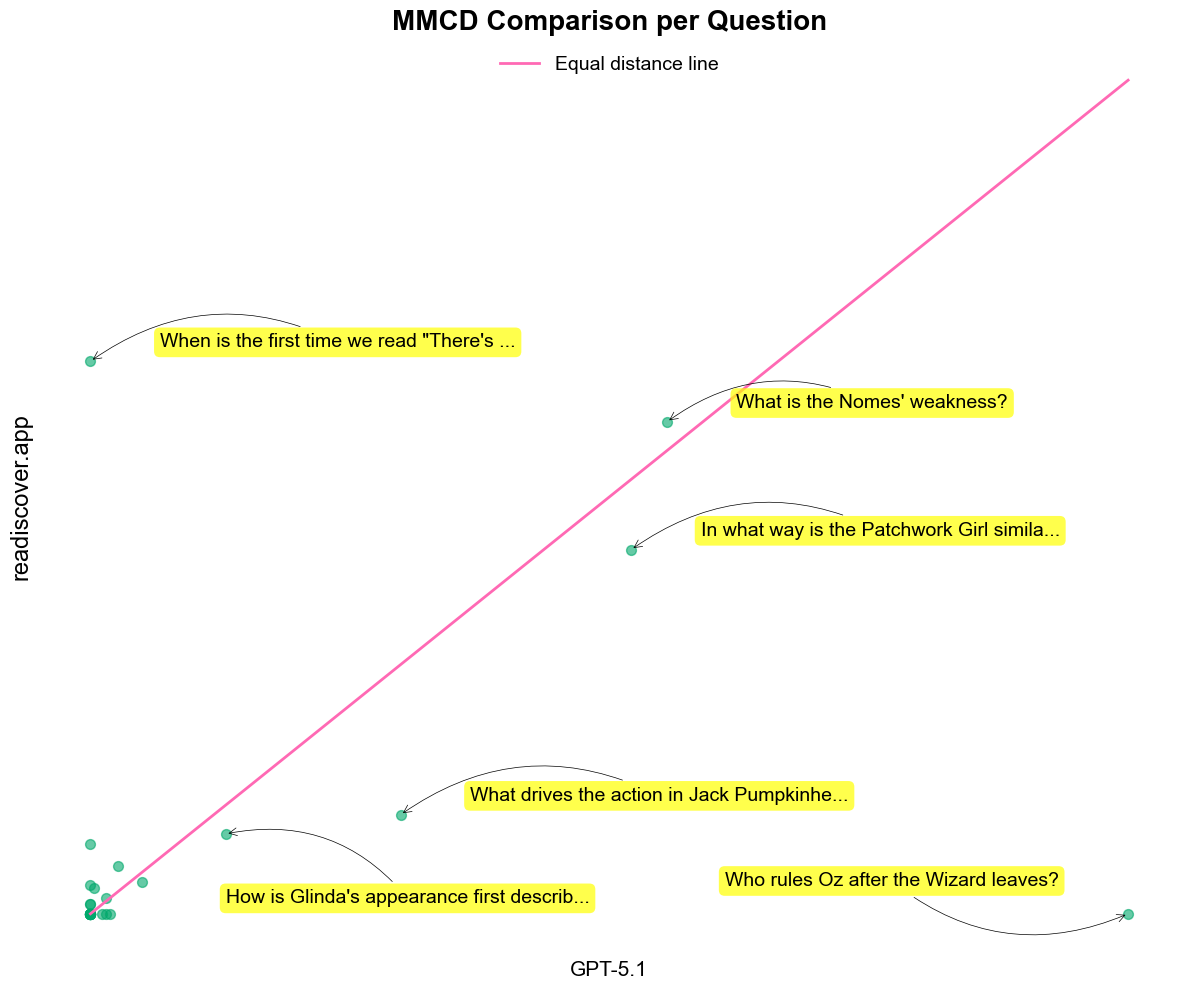

In [15]:
# Merge the question-level metrics to compare min_chunk_distance
best_test_num_TEST = int(best_readiscovers_TEST['test_number'])
readiscovers_distances_TEST = readiscovers_question_metrics_TEST[
    readiscovers_question_metrics_TEST['test_number'] == best_test_num_TEST
][['original_query', 'min_chunk_distance']].copy()
readiscovers_distances_TEST = readiscovers_distances_TEST.rename(columns={'min_chunk_distance': 'readiscovers_distance'})

chatgpt_distances_TEST = oz_question_metrics_TEST[['question', 'min_chunk_distance']].copy()
chatgpt_distances_TEST = chatgpt_distances_TEST.rename(columns={'min_chunk_distance': 'chatgpt_distance'})

# Merge on question text
distance_comparison_TEST = readiscovers_distances_TEST.merge(
    chatgpt_distances_TEST,
    left_on='original_query',
    right_on='question',
    how='inner'
)

# Remove rows where either distance is NaN
distance_comparison_TEST = distance_comparison_TEST.dropna(subset=['readiscovers_distance', 'chatgpt_distance'])

# Calculate difference for identifying outliers
distance_comparison_TEST['difference'] = distance_comparison_TEST['readiscovers_distance'] - distance_comparison_TEST['chatgpt_distance']

# Identify outliers using IQR method
outliers_TEST = distance_comparison_TEST[
    (distance_comparison_TEST['readiscovers_distance'] > 25) |
    (distance_comparison_TEST['chatgpt_distance'] > 25)
]

# Create single scatter plot
fig, ax = plt.subplots(figsize=(12, 10), facecolor='white')
ax.set_facecolor('white')

# Plot all points
ax.scatter(distance_comparison_TEST['chatgpt_distance'],
           distance_comparison_TEST['readiscovers_distance'],
           alpha=0.6, s=50, color='#00A86B')

# Plot equal distance line
max_val_TEST = max(distance_comparison_TEST[['chatgpt_distance', 'readiscovers_distance']].max())
ax.plot([0, max_val_TEST], [0, max_val_TEST], color='#FF69B4',
        label='Equal distance line', linewidth=2)

# Label outliers
# ...existing code...

# Label outliers
for _, row in outliers_TEST.iterrows():
    question_text = row['original_query'][:40] + '...' if len(row['original_query']) > 40 else row['original_query']

    # Adjust label position for specific markers
    # For markers around (150, 150), place label on the left
    if row['chatgpt_distance'] > 160:
        xytext_offset = (-50, 20)  # Left side
        ha_align = 'right'
    elif row['chatgpt_distance'] > 25 and row['chatgpt_distance'] < 50:
        xytext_offset = (0, -50)  # Underneath
        ha_align = 'left'
    else:
        xytext_offset = (50, 10)  # Right side (default)
        ha_align = 'left'

    ax.annotate(question_text,
                xy=(row['chatgpt_distance'], row['readiscovers_distance']),
                xytext=xytext_offset,
                textcoords='offset points',
                fontsize=14,
                fontfamily='Arial',
                ha=ha_align,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7, edgecolor='none'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', color='black', lw=0.5))

ax.set_xlabel('GPT-5.1', fontsize=15, fontfamily='Arial')
ax.set_ylabel('readiscover.app', fontsize=17, fontfamily='Arial')
ax.set_title('MMCD Comparison per Question',
             fontsize=20, fontweight='bold', fontfamily='Arial')

# Update legend
legend = ax.legend(facecolor='white', edgecolor='none', loc='upper center',
                   prop={'family': 'Arial', 'size': 14})
legend.get_frame().set_alpha(1)

# Update spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x', length=0, labelbottom=False)  # Remove x-axis tick marks
ax.tick_params(axis='y', length=0, labelleft=False)  # Remove y-axis tick marks


plt.tight_layout()
plt.show()